## Importong The Library

In [2]:
import pandas as pd 
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
## Loading the Dataset 

df = pd.read_csv('retail_sales_dataset.csv')

## Data Inspection 

In [5]:
# Display the top five rows of the Dataset
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:

# last five rows

df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
# cheking the shape of the data
df.shape

(1000, 9)

In [8]:
# data information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
# checking the columns
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [10]:
# checking for duplicates

duplicates = df.duplicated().sum()

duplicates

0

In [11]:
#checking data type

df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [12]:
# Summary Statistics

df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Data Cleaning

In [14]:
# checking for null values 

df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
# dropping column that is not relevant for the analysis
df.drop(columns ='Transaction ID', inplace = True)

In [16]:
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [17]:
# changing the date data type

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [19]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: ylabel='count'>

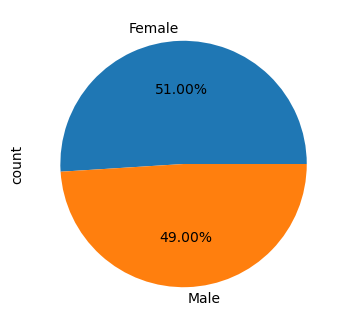

In [20]:
# pie chart
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [21]:
# frequency of Product Category
df['Product Category'].value_counts()


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category'>

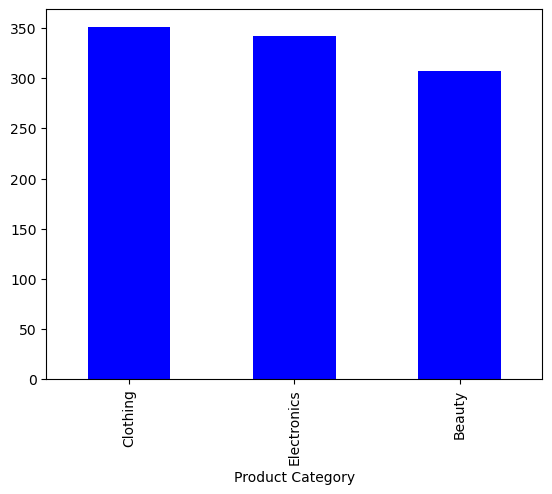

In [22]:
df['Product Category'].value_counts().plot(kind='bar', color='blue')

## Group product catagory, by quantity and total amount

In [24]:
df.groupby('Product Category')[['Quantity', 'Total Amount']].sum()


,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


## Visualize the product category by showing camparison

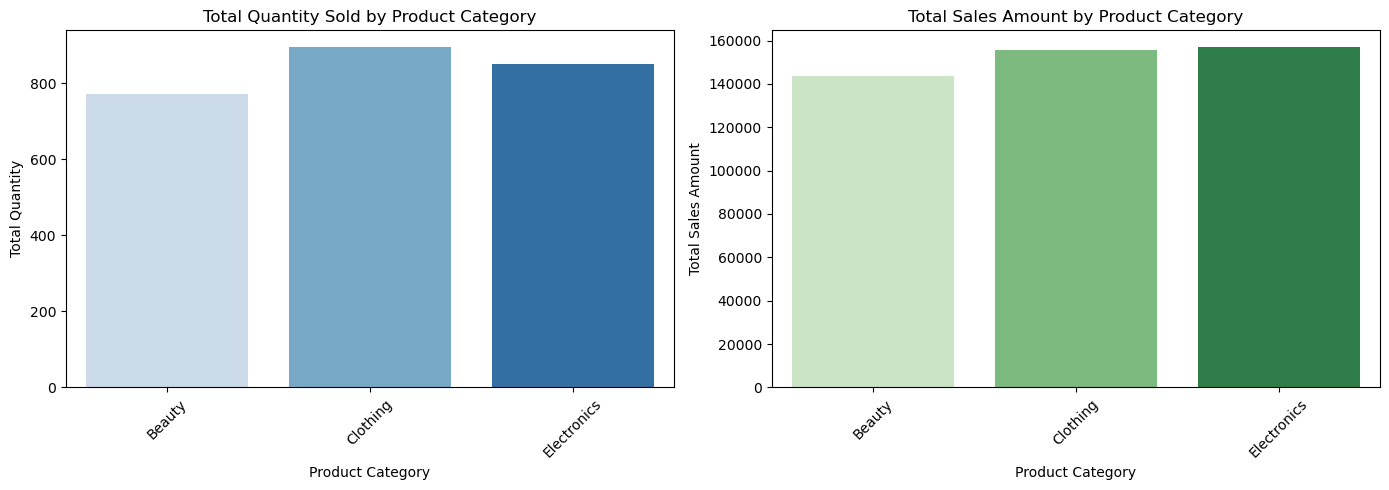

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data
category_summary = df.groupby('Product Category')[['Quantity', 'Total Amount']].sum()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Quantity
sns.barplot(x=category_summary.index, y=category_summary['Quantity'], ax=ax[0], palette='Blues')
ax[0].set_title('Total Quantity Sold by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Quantity')
ax[0].tick_params(axis='x', rotation=45)

# Bar plot for Total Amount
sns.barplot(x=category_summary.index, y=category_summary['Total Amount'], ax=ax[1], palette='Greens')
ax[1].set_title('Total Sales Amount by Product Category')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Sales Amount')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Convert date into day,month and year

In [28]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month name
df['Month'] = df['Date'].dt.month_name()

# Display the 'Month' column
print(df['Month'])


0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object


## Time Series Analysis

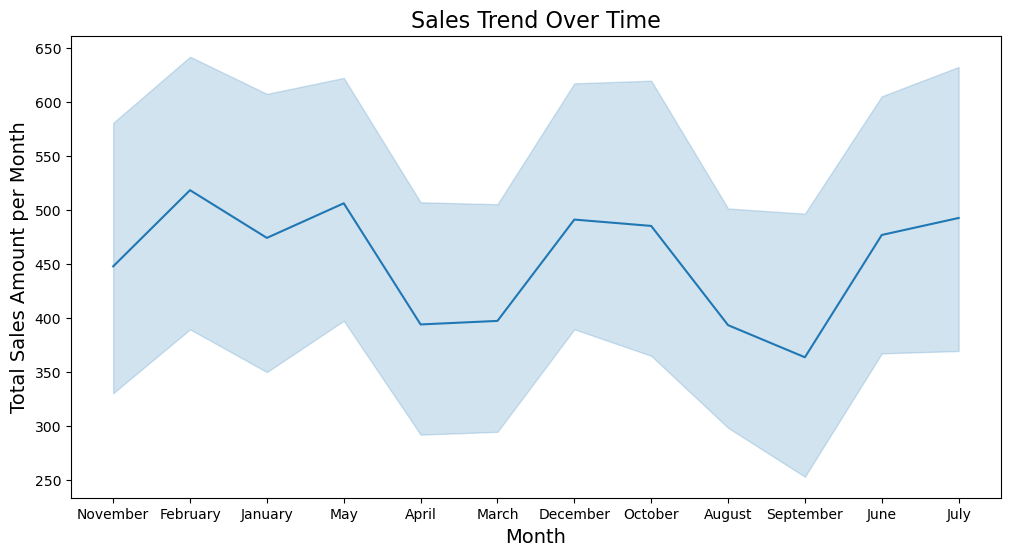

In [30]:
# Sales trends over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total Amount', data=df)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per Month', fontsize=14)
plt.show()

In [31]:
import pandas as pd

# Define age groups and bins
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
age_bins = [0, 18, 25, 35, 50, 58]

# Create 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_group)

# Display the first few rows of the DataFrame
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,26-35
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,26-35
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,36-50
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,36-50
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,26-35


## Distribution of age and gender column in product ccategory

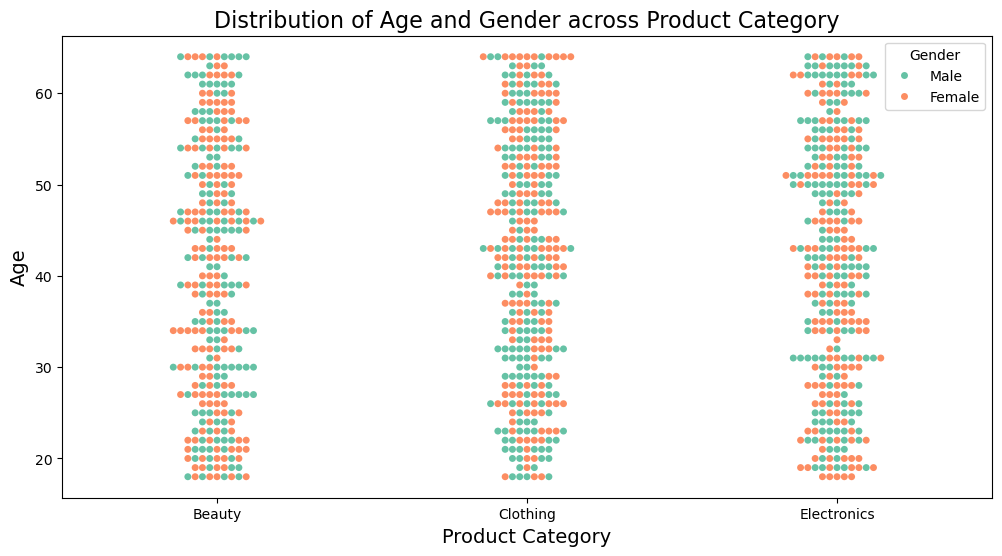

In [33]:

plt.figure(figsize=(12,6))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc='upper right', fontsize=10)
plt.show()

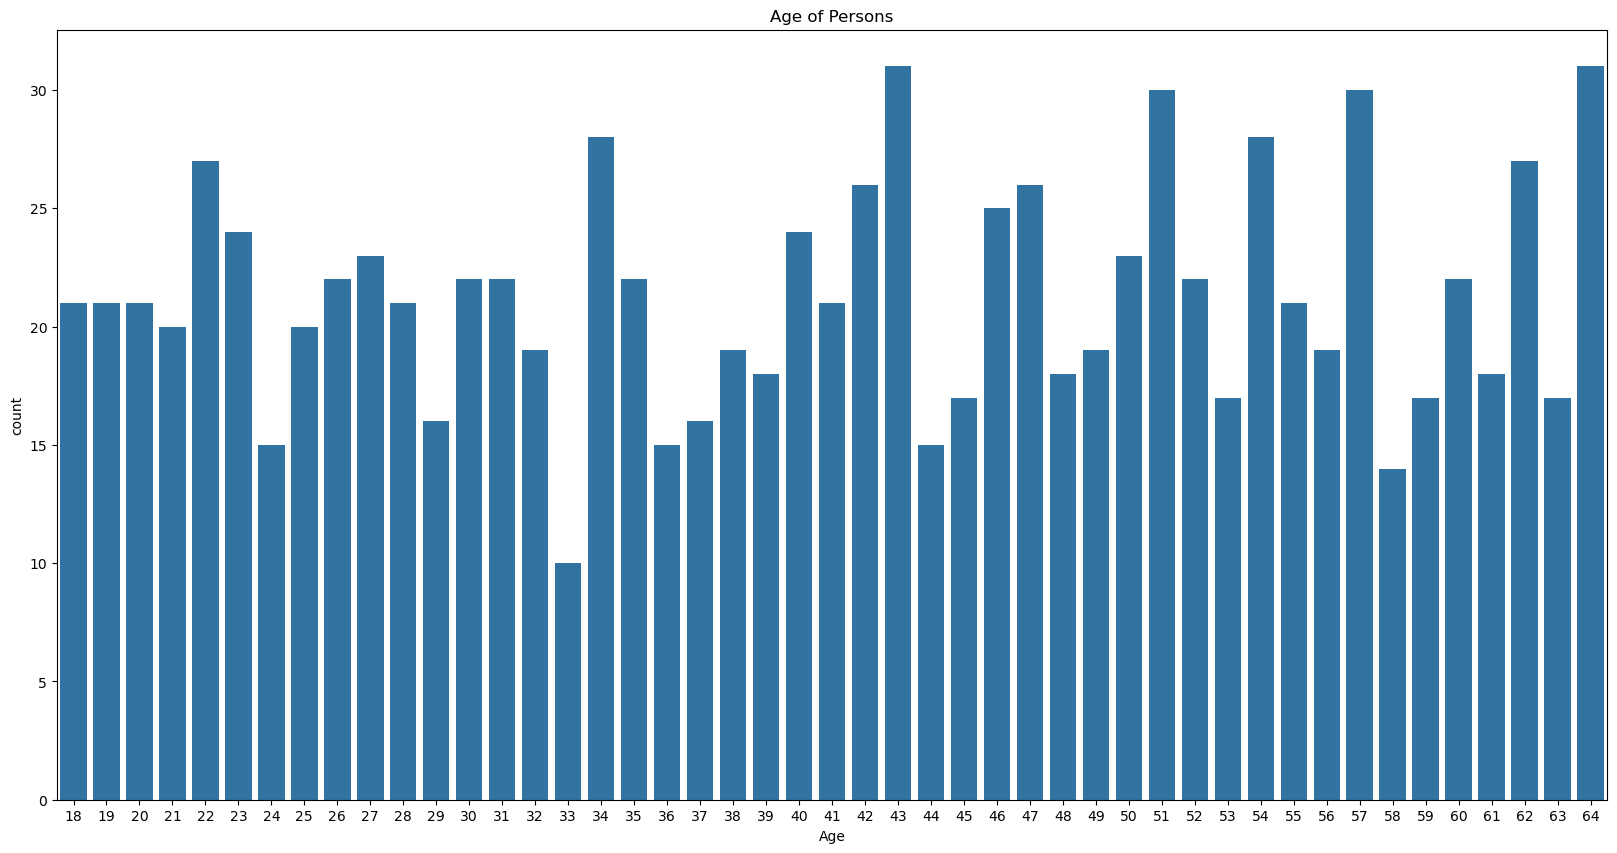

In [34]:

# Set figure size
plt.figure(figsize=(20, 10))

# Set title and labels
plt.title("Age of Persons")
plt.xlabel("Age")

# Create histogram
sns.countplot(x="Age", data=df)

# Show plot
plt.show()

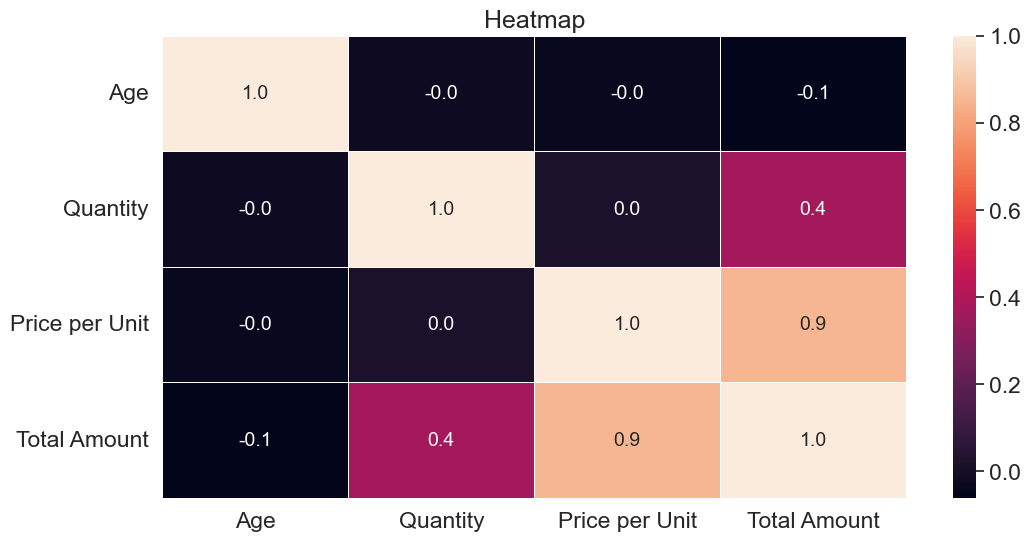

In [35]:

# Compute correlation matrix for numerical columns
correlation = df[df.dtypes[df.dtypes == 'int64'].index].corr()

# Set font scale
sns.set(font_scale=1.5)

# Create heatmap
plt.figure(figsize=(12, 6))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True, annot_kws={"size": 14}, fmt='.1f', linewidths=.5)

# Show plot
plt.show()